C:\Users\Ederson\Anaconda3\lib\site-packages\pandas_datareader\google\daily.py:40: UnstableAPIWarning: 
The Google Finance API has not been stable since late 2017. Requests seem
to fail at random. Failure is especially common when bulk downloading.

  warnings.warn(UNSTABLE_WARNING, UnstableAPIWarning)


<IPython.core.display.Javascript object>


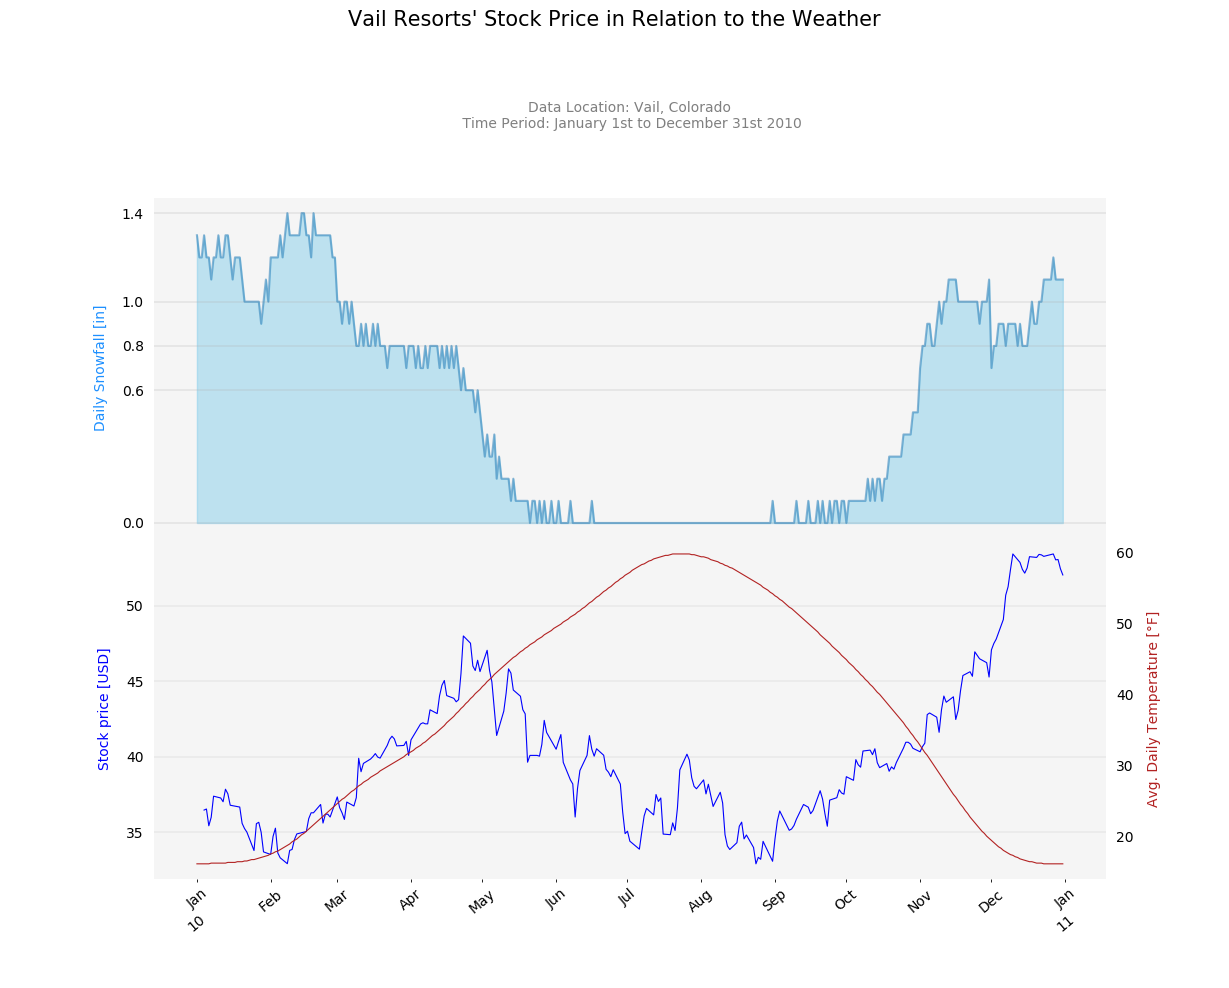

In [39]:
from pandas_datareader import data as dreader
import pandas as pd
import numpy as np
from qgrid import show_grid as grid
from matplotlib.dates import DateFormatter, WeekdayLocator,DayLocator, MONDAY, MonthLocator, YearLocator

%matplotlib notebook
import matplotlib.pyplot as plt

date_index=pd.date_range('2010-01-01',"2010-12-31",freq="D")

#read stock prices
stock=pd.DataFrame(dreader.DataReader('MTN','google','2010-01-01','2010-12-31'))
stock.drop(["Open","High","Low","Volume"],axis=1, inplace=True)

#read weather data
weather_daily=pd.read_csv("weather_summit_county_daily.csv",names=["station","date","rain-ytd","snow-ytd","avg-temp-daily"],usecols=[1,2,3,5,7], header=0)
weather_daily=weather_daily[weather_daily["station"]=="VAIL CO US"]

weather_daily.set_index(date_index, inplace=True)
weather_daily.drop("date",axis=1, inplace=True)

weather_daily["snow-daily"]=weather_daily["snow-ytd"] - weather_daily["snow-ytd"].shift(1) 
weather_daily.set_value("2010-01-01","snow-daily",1.3)

# fucntion to plot with 2 different scales
def two_scales(ax1, 
               time1,data1,title1,color1, 
               time2,data2,title2,color2):
    
    '''Plots a graph using 2 different Y scales and sharing a datetime X scale'''
    
    ax2=ax1.twinx()
    
    ax1.plot(time1, data1, color=color1, lw=0.8)
   
    ax1.set_ylabel(title1, color=color1, labelpad=10)
  
    month= MonthLocator()
    year=YearLocator()
    yearformatter=DateFormatter("%y")
    monthformatter=DateFormatter("%b")

    ax1.xaxis.set_major_locator(year)
    ax1.xaxis.set_minor_locator(month)
    ax1.xaxis.set_major_formatter(yearformatter)
    ax1.xaxis.set_minor_formatter(monthformatter)
    
    ax2.plot(time2, data2,color=color2, lw=0.8)
    ax2.set_ylabel(title2,color=color2, labelpad=10)
    
    ax2.xaxis.set_major_locator(year)
    ax2.xaxis.set_minor_locator(month)
    ax2.xaxis.set_major_formatter(yearformatter)
    ax2.xaxis.set_minor_formatter(monthformatter)
    
    ax1.tick_params(axis="both", which="both", bottom="on", top="off", left="off", right="off")
    ax2.tick_params(axis="both", which="both", bottom="on", top="off", left="off", right="off")
    ax1.tick_params(axis="x", which="major", pad=20, bottom="off")
    
    
    
    for spine in ax1.spines.values():
        spine.set_visible(False)
    
    for spine in ax2.spines.values():
        spine.set_visible(False)
        
    return ax1, ax2


#plot

fig, (ax1,ax2)=plt.subplots(2,1, sharex=True)

ax1.set_facecolor("whitesmoke")
ax2.set_facecolor("whitesmoke")

plt.suptitle("Vail Resorts' Stock Price in Relation to the Weather\n", fontsize=15, y=.99)
plt.title("Data Location: Vail, Colorado\n Time Period: January 1st to December 31st 2010",
         color="grey", fontsize=10, y=2.18)

ax1.set_ylabel("Daily Snowfall [in]", labelpad=10, color="dodgerblue")
ax1.plot(weather_daily.index, weather_daily["snow-daily"], alpha=0.5)
ax1.fill_between(weather_daily.index, weather_daily["snow-daily"], alpha=0.5, color="skyblue")

ax1.yaxis.set_ticks([.0,0.6,0.8,1.0,  1.4],minor=False)

ax2,ax3 =two_scales(ax2,
                    stock.index, stock.Close, "Stock price [USD]","b",
                    weather_daily.index, weather_daily["avg-temp-daily"], "Avg. Daily Temperature [°F]","firebrick")



#hide spines and ticks
ax1.tick_params(axis="both", which="both", bottom="off", top="off", left="off")
plt.yticks(fontname="DIN")
for spine in ax1.spines.values():
    spine.set_visible(False)

for tl in ax2.xaxis.get_ticklabels(which="both"):
    tl.set_ha("center")
    tl.set_rotation(40)


plt.subplots_adjust(hspace=0.0)
plt.subplots_adjust(top=.8)
ax1.grid(b=True, which="major", axis="y", lw=0.3)
ax2.grid(b=True, which="major", axis="y", lw=0.2)
